<a href="https://colab.research.google.com/github/itssofiarce/python/blob/master/RegresionLogistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Crear un conjunto de datos sintético
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)


In [3]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

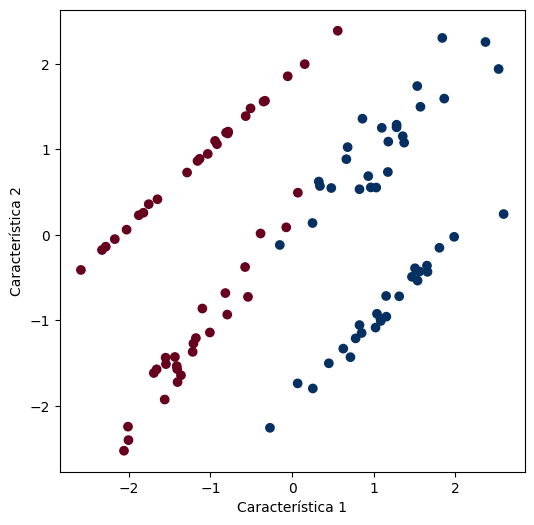

In [4]:
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu, marker='o')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100), np.linspace(ylim[0], ylim[1], 100))
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.show()

In [5]:
# Inicializar y entrenar un modelo de regresión logística
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

In [6]:
model

LogisticRegression(random_state=42)

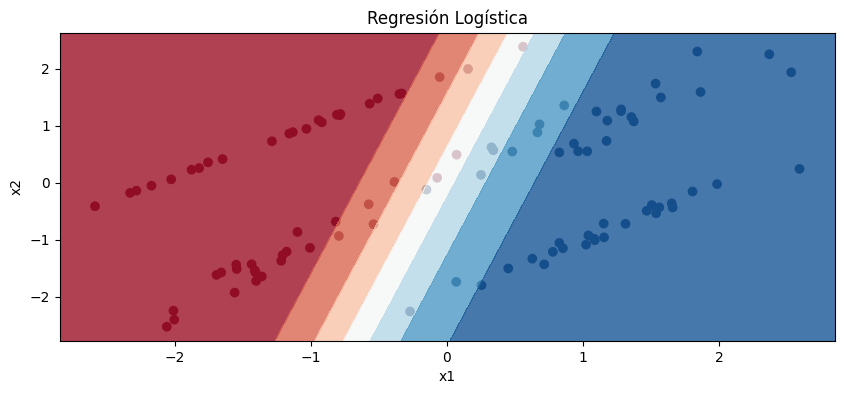

In [7]:
# Visualizar los datos y la frontera de decisión del modelo
plt.figure(figsize=(10, 4))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu, marker='o')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100), np.linspace(ylim[0], ylim[1], 100))
Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.8)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Regresión Logística')
plt.show()

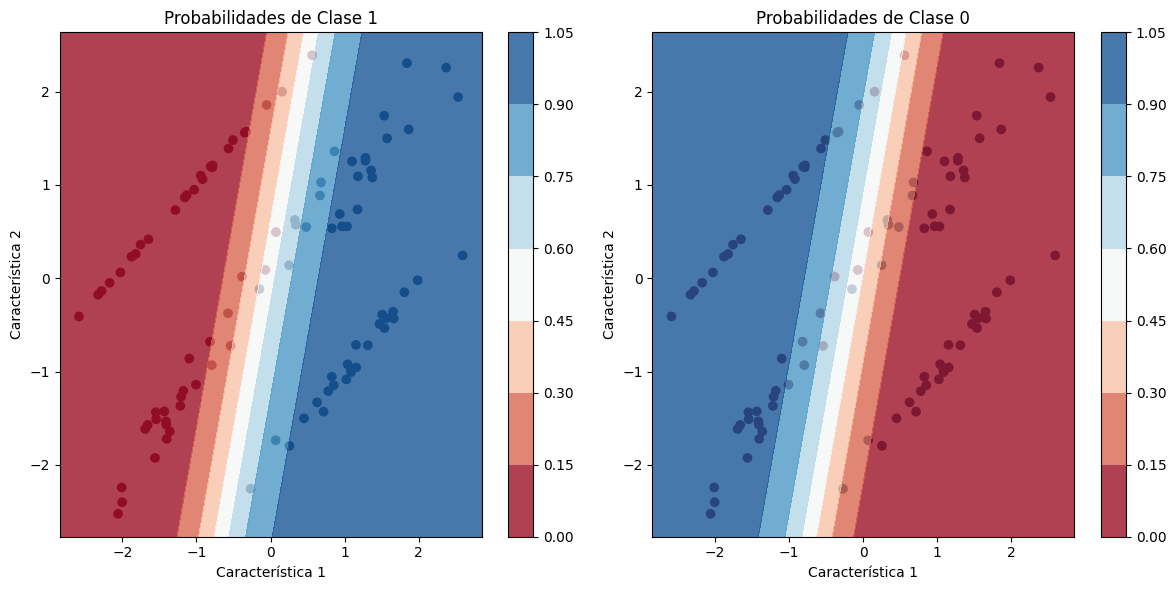

In [8]:
# Visualizar los datos y la frontera de decisión del modelo con probabilidades
plt.figure(figsize=(12, 6))

# Graficar las probabilidades de pertenencia a la clase 1 (positiva)
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu, marker='o')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100), np.linspace(ylim[0], ylim[1], 100))
Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.8)
plt.colorbar()
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.title('Probabilidades de Clase 1')

# Graficar las probabilidades de pertenencia a la clase 0 (negativa)
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu, marker='o')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100), np.linspace(ylim[0], ylim[1], 100))
Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 0]
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.8)
plt.colorbar()
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.title('Probabilidades de Clase 0')

plt.tight_layout()
plt.show()

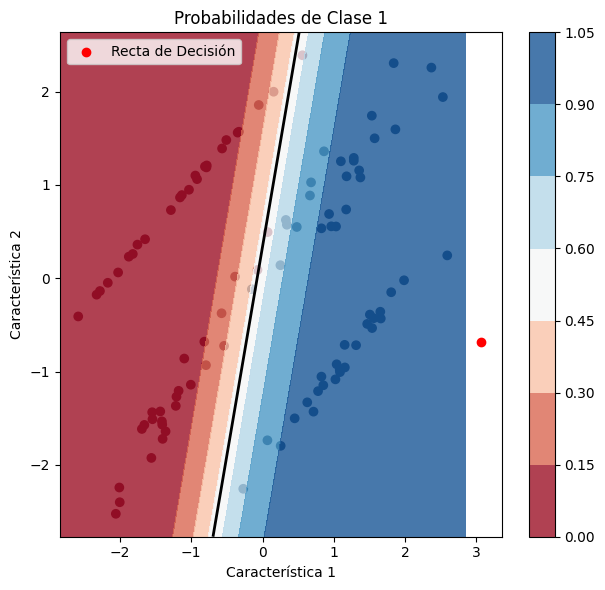

In [9]:
# Obtener los coeficientes del modelo para la recta de decisión
coef = model.coef_
intercept = model.intercept_

# Visualizar los datos y la frontera de decisión del modelo con probabilidades y recta
plt.figure(figsize=(12, 6))

# Graficar las probabilidades de pertenencia a la clase 1 (positiva)
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu, marker='o')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100), np.linspace(ylim[0], ylim[1], 100))
Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.8)
plt.colorbar()
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.title('Probabilidades de Clase 1')

# Graficar la recta de decisión
plt.contour(xx, yy, model.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape), levels=[0], linewidths=2, colors='k')
plt.scatter(coef[0][0], coef[0][1], marker='o', color='red', label='Recta de Decisión')
plt.legend()

plt.tight_layout()
plt.show()

Ejemplo: Clasificación de Vidrios

In [10]:
# Importo el dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data'
col_names = ['id','ri', 'na', 'mg', 'al', 'si', 'k', 'ca', 'ba', 'fe', 'glass_type']
glass = pd.read_csv(url, names=col_names, index_col='id')
glass.sort_values('al', inplace=True)
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type
id,,,,,,,,,,
22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1
185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6
40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1
51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1


1. Id number: 1 to 214
2. RI: refractive index
3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
4. Mg: Magnesium
5. Al: Aluminum
6. Si: Silicon
7. K: Potassium
8. Ca: Calcium
9. Ba: Barium
10. Fe: Iron
11. Type of glass:
 (class attribute)
    1. building_windows_float_processed
    2. building_windows_non_float_processed
    3. vehicle_windows_float_processed
    4. vehicle_windows_non_float_processed (none in this database)
    5. containers
    6. tableware
    7. headlamps

<ipython-input-11-5507219ec455>:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.relplot(x="glass_type", y="si",


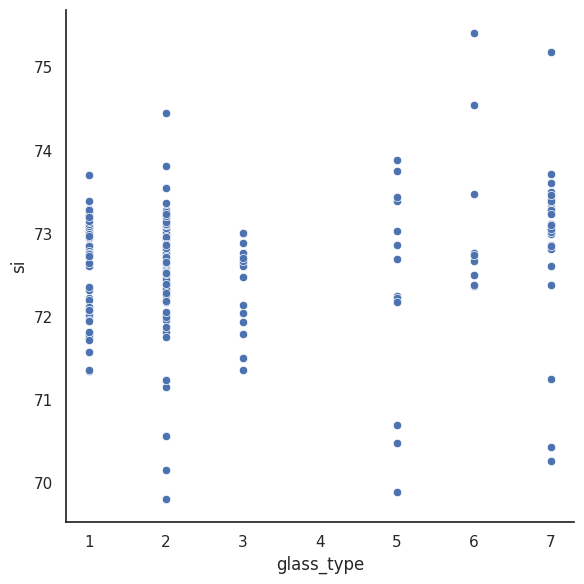

In [11]:
# Plotep de las clases va algún feature
# En funcion de una de las variables explicacitvas vemos como se distribuyen las demas
sns.set(style="white")

sns.relplot(x="glass_type", y="si",
            sizes=(40, 400), palette="bright",
            height=6, data=glass)

In [12]:
# Posible desbalanceo
glass.glass_type.value_counts().sort_index()

glass_type
1    70
2    76
3    17
5    13
6     9
7    29
Name: count, dtype: int64

c 1, 2, 3 --> Ventanas --> 0
c 5, 6, 7 --> Vajilla --> 1


In [13]:
# Re-clasificación --> nueva columna
glass['household'] = glass.glass_type.map({1:0, 2:0, 3:0, 5:1, 6:1, 7:1})
glass.head()

,ri,na,mg,al,si,k,ca,ba,fe,glass_type,household
id,,,,,,,,,,,
22,1.51966,14.77,3.75,0.29,72.02,0.03,9.00,0.0,0.00,1,0
185,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.0,0.00,6,1
40,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,0
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.00,1,0
51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.0,0.16,1,0


<ipython-input-14-68f18f53432a>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.relplot(x="household", y="si",


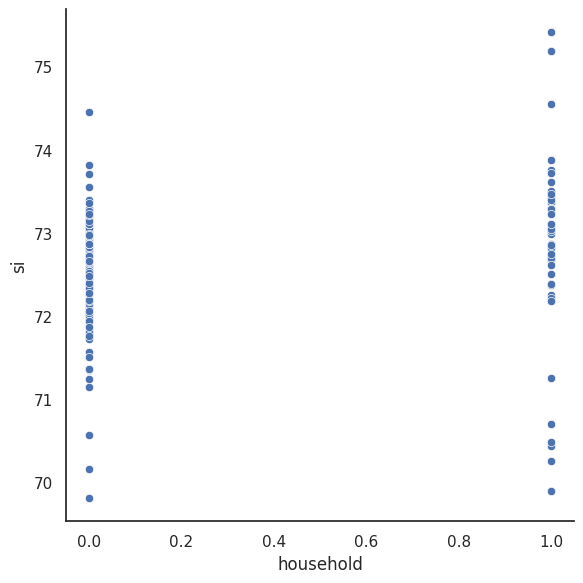

In [14]:
sns.set(style="white")

sns.relplot(x="household", y="si",
            sizes=(40, 400), palette="bright",
            height=6, data=glass)

El gráfico indica que aquellos que son de ventana tienen niveles de aluminio menor que el resto.

In [15]:
# Defino el modelo
logreg = LogisticRegression()
logreg_2D = LogisticRegression()

In [16]:
# Dimensiones
X = glass.drop(['household', 'glass_type'], axis = 1)
# Variable a clasificar
y = glass['household']

# Divido en mi cjt de entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
feature_cols = ['al', 'na'] # Cantidad de aluminio y gases??
X_2D = glass[feature_cols]
y_2D = glass.household

X_train_2D, X_test_2D, y_train_2D, y_test_2D = train_test_split(X_2D, y_2D, test_size=0.3, random_state=42)

In [18]:
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
logreg.fit(X_train_2D, y_train_2D)
y_pred = logreg.predict(X_test_2D)

In [ ]:
# copiar el grafico

In [ ]:
# Metricas para comparar modelos


- Accuracy: Proporción de predicciones correctas realizadas por el modelo sobre el total de predicciones realizadas
    - Correctas/Totales
- Recall: Proporción de instancias positivas que el modelo predijo correctamente respecto a todas las instancias positivas reales
  - VP/ (VP+FN)
- F1-Score: Media Armónica de prediccion y recall. Proporciona una medida que combina ambos aspectos del rendimiento del modelo.
  - Precisión*Recall / (Precisión + Recall)
- Support: Nro de instancias en el cjt de datos que pertenecen a cada clase. Ayuda a entender cuán representativas son las muestras de cada clase.